In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\techno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\techno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df = pd.read_csv(r"C:\Users\techno\OneDrive\Data Trained\Flip Robo (Batch 1836)\Car Price Prediction\Scraped Data\carpriceprediction_11.4.22.csv")

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [5]:
df.drop(columns=['index'], inplace=True)

In [6]:
for i in range(df.shape[0]):
        df['Brand'].loc[i] = df['Brand'].loc[i].replace(' ','')
        df['Brand'].loc[i] = df['Brand'].loc[i].upper()
        df['Brand'].loc[i] = df['Brand'].loc[i].replace('-','')
        df['Brand'].loc[i] = df['Brand'].loc[i].replace('SUZUKI','')
        df['Variant'].loc[i] = df['Variant'].loc[i].replace(' ','')
        df['Variant'].loc[i] = df['Variant'].loc[i].upper()
        df['Fuel Type'].loc[i] = df['Fuel Type'].loc[i].replace(' ','')
        df['Fuel Type'].loc[i] = df['Fuel Type'].loc[i].upper()

In [7]:
df_processed = df

In [8]:
brand_drop = ['MAHINDRAVERITO', 'FORDNEWFIGO', 'NISSANKICKS', 'BMWX6', 'CHEVROLETCAPTIVA', 'SKODAKODIAQ', 'AUDITT', 'VOLVOS90', 'DATSUNGOPLUS', 'FORDASPIRE', 'TATANEWSAFARI', 'VOLVOXC40', 'AUDIA8', 'BMW1SERIES', 'FIATAVVENTURA', 'MAHINDRAALTURAS', 'CHEVROLETAVEO', 'CHEVROLETAVEOUVA', 'MARUTIESTILO', 'RENAULTKIGER', 'BMW3SERIESGT', 'BAJAJRE60', 'BMWZ4', 'AUDIA7', 'MAHINDRAJEEP', 'FORDMUSTANG', 'BENTLEYCONTINENTAL', 'CHEVROLETOPTRA', 'AUDIQ2', 'MAHINDRAE2O', 'AUDIA5', 'MAHINDRAXUV3OO', 'BMWX4', 'BENTLEYCONTINENTALFLYINGSPUR', 'BMWX7', 'AUDIRS5', 'AUDIR8', 'MERCEDESBENZMLCLASS', 'MERCEDESBENZGCLASS']

In [9]:
variant_drop = ['--', 'KA04', 'KA01', 'KA53', 'WB06', 'KA02', 'DL9C', 'WB98', 'KA09', 'KA22', 'WB24', 'WB08', 'MH01', 'RJ43', 'MH46', 'HR26', 'RJ23', 'KA51', 'RJ14', 'DL10', 'RJ01', 'TS10', 'KA19']

In [10]:
fuel_drop = ['--']

In [11]:
year_drop = [13, 12, 8, 19, 10, 14]

In [12]:
code_drop = ['DROP']

In [13]:
for i in range(df.shape[0]):
    if df['Brand'].loc[i] in brand_drop:
        df['Brand'].loc[i] = np.nan
    if df['Variant'].loc[i] in variant_drop:
        df['Variant'].loc[i] = np.nan
    if df['Fuel Type'].loc[i] in fuel_drop:
        df['Fuel Type'].loc[i] = np.nan
    if df['Manufacturing Year'].loc[i] in year_drop:
        df['Manufacturing Year'].loc[i] = np.nan
    if df['Model_Code'].loc[i] in code_drop:
        df['Model_Code'].loc[i] = np.nan        

In [14]:
fuel_encode = {
    'Petrol':0,
    'Diesel':1,
    'DIESEL':1,
    'PETROL':0,
    'CNG':2,
    'CNG & HYBRIDS':3,
    'LPG':4,
    'Petrol + CNG':3,
    'PETROL/COMPRESSED NATURAL GAS':3,
    'Petrol + LPG':5,
    'PETROL/LIQUIFIED PETROLEUM GAS':5,
    'Electric(Battery)':6,
    'ELECTRIC':6
}

In [15]:
location_encode = {
    'Ahmedabad':0,
    'Bangalore':1,
    'Bengaluru':1,
    'Chandigarh':2,
    'Chennai':3,
    'Delhi':4,
    'Delhi NCR':4,
    'Gurgaon':4,
    'Noida':4,
    'Hyderabad':5,
    'Jaipur':6,
    'Kolkata':7,
    'Mumbai':8,
    'Pune':9
}

In [16]:
df['Location'] = df['Location'].map(location_encode)
df['Fuel Type'] = df['Fuel Type'].map(fuel_encode)

In [17]:
df.dropna(inplace=True)

In [18]:
df.reset_index(inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Variant']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
df['Brand']=ord_enc.fit_transform(df[['Brand']])

In [21]:
df.dtypes

index                   int64
Brand                 float64
Model                  object
Model_Code             object
Variant                 int32
Manufacturing Year    float64
Fuel Type             float64
Driver Kilometers       int64
Number of Owners      float64
Location                int64
Car Price               int64
dtype: object

In [22]:
df.drop(columns=['Model', 'index' ], inplace=True)

In [23]:
for i in range(df.shape[0]):
    df['Manufacturing Year'].loc[i] = round(df['Manufacturing Year'].loc[i])
    df['Number of Owners'].loc[i] = round(df['Number of Owners'].loc[i])
    df['Fuel Type'].loc[i] = round(df['Fuel Type'].loc[i])

In [25]:
df.rename(columns = {'Model_Code': 'Model', 'Manufacturing Year': 'Mfg Year', 'Fuel Type': 'Fuel', 'Driver Kilometers': 'Km', 'Number of Owners':'Owners'}, inplace=True)

In [27]:
df.dtypes

Brand        float64
Model         object
Variant        int32
Mfg Year     float64
Fuel         float64
Km             int64
Owners       float64
Location       int64
Car Price      int64
dtype: object

In [28]:
df['Model'].value_counts()

1     3636
2     3271
3     2738
4     2443
0     2195
7     1614
5     1227
6     1070
8      482
9      479
10     336
11     287
12      87
13      41
15      34
14      19
16       3
17       3
Name: Model, dtype: int64

In [29]:
for i in range(df.shape[0]):
    df['Model'].loc[i] = round(int(df['Model'].loc[i]))

In [30]:
df.dtypes

Brand        float64
Model         object
Variant        int32
Mfg Year     float64
Fuel         float64
Km             int64
Owners       float64
Location       int64
Car Price      int64
dtype: object

In [31]:
#Data Summary
df.shape

(19965, 9)

In [32]:
df.isnull().sum().sort_values(ascending=False)

Brand        0
Model        0
Variant      0
Mfg Year     0
Fuel         0
Km           0
Owners       0
Location     0
Car Price    0
dtype: int64

In [33]:
#find duplicates
df.duplicated().sum()

332

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
#Data Summary
df.shape

(19633, 9)

In [36]:
df.reset_index(inplace=True)

In [37]:
df.drop(columns=['index'], inplace=True)

In [38]:
df

,Brand,Model,Variant,Mfg Year,Fuel,Km,Owners,Location,Car Price
0,0.0,2,0,2016.0,1.0,59000,1.0,1,1850000
1,0.0,1,0,2018.0,1.0,39254,2.0,0,1968199
2,0.0,1,0,2016.0,1.0,60000,1.0,5,1500000
3,0.0,2,0,2015.0,1.0,60000,2.0,3,1400000
4,0.0,2,0,2015.0,1.0,60000,1.0,4,1450000
...,...,...,...,...,...,...,...,...,...
19628,169.0,0,0,2016.0,1.0,50000,1.0,4,4500000
19629,169.0,1,0,2019.0,1.0,27000,1.0,2,6650000
19630,169.0,1,0,2015.0,1.0,78000,1.0,2,3900000
19631,169.0,1,0,2016.0,1.0,72000,1.0,3,3990000


In [39]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Model         object
Brand        float64
Mfg Year     float64
Fuel         float64
Owners       float64
Km             int64
Location       int64
Car Price      int64
Variant        int32
dtype: object

In [40]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Brand 

100.0    891
35.0     826
51.0     737
54.0     711
105.0    684
        ... 
50.0      10
44.0      10
29.0      10
129.0     10
8.0        9
Name: Brand, Length: 170, dtype: int64
*******************************************************
*******************************************************
Value counts of Model 

1     3588
2     3214
3     2703
4     2397
0     2159
7     1584
5     1194
6     1053
8      476
9      471
10     328
11     283
12      85
13      40
15      33
14      19
16       3
17       3
Name: Model, dtype: int64
*******************************************************
*******************************************************
Value counts of Variant 

1    14662
0     4971
Name: Variant, dtype: int64
*******************************************************
*******************************************************
Value counts of Mfg Year 

2017.0    2432
2018.0    2327
2016.0    2317
2015.0

<AxesSubplot:ylabel='Location'>

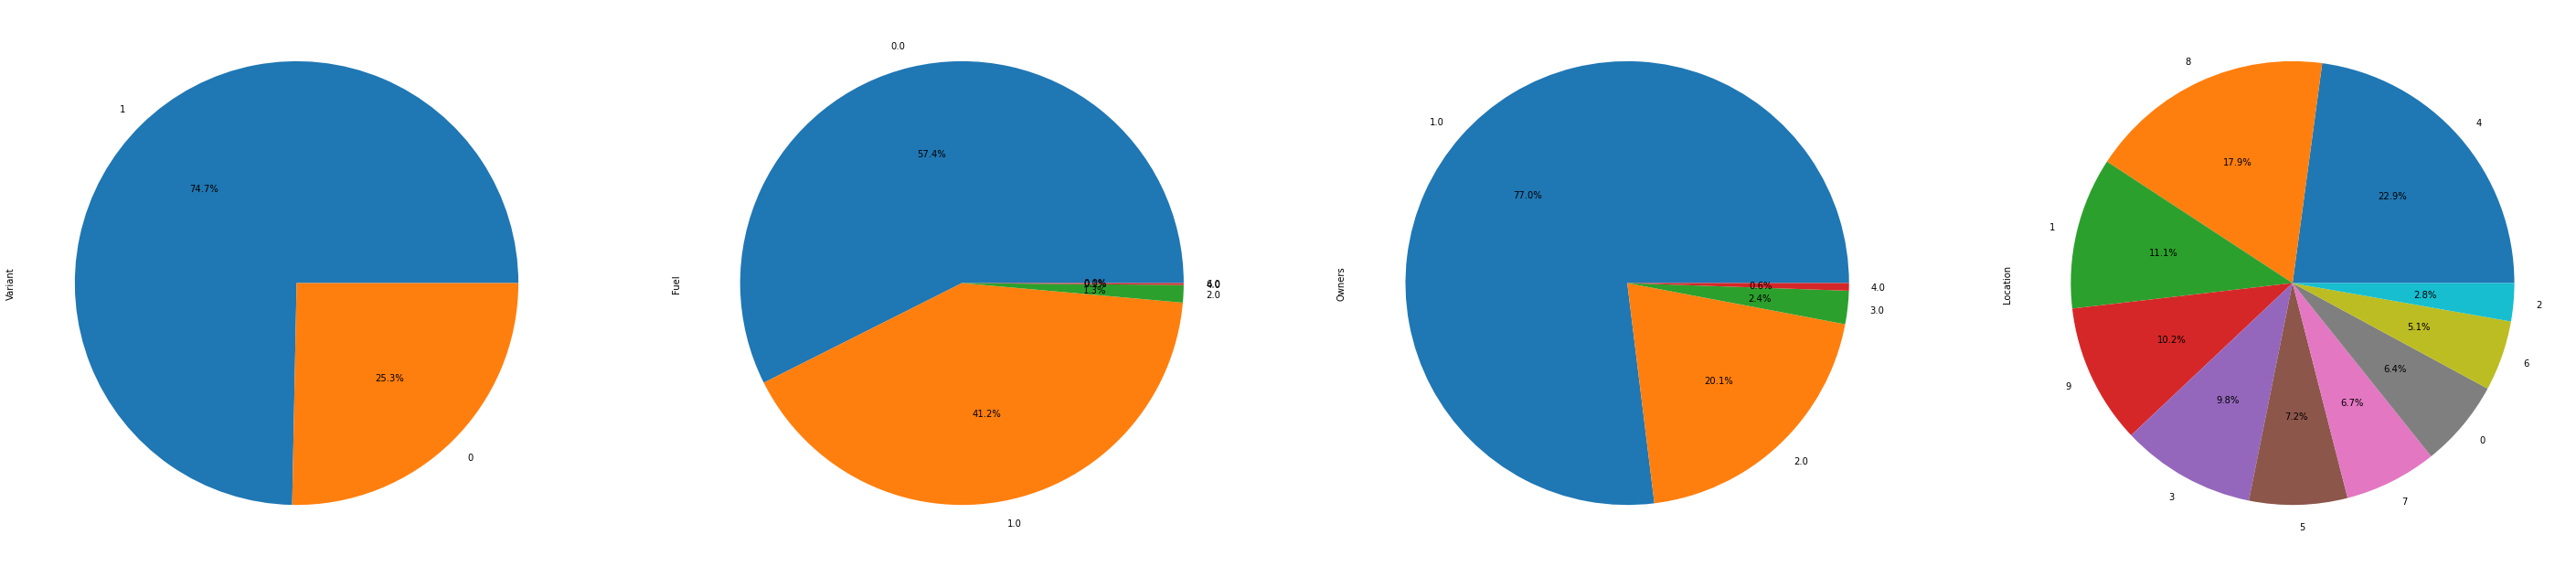

In [41]:
plt.figure(figsize=(50,25))
plt.subplot(1,4,1)
df['Variant'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,4,2)
df['Fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,4,3)
df['Owners'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,4,4)
df['Location'].value_counts().plot.pie(autopct='%1.1f%%')

In [42]:
#Dividing Each Data As per their type

#Categorical
Ordinal = ['Model', 'Owners']
Nominal = ['Brand', 'Variant', 'Fuel', 'Location']


#Quantitative
Continuous = ['Km', 'Car Price']
Discrete = ['Mfg Year']

In [43]:
df[Continuous].describe()

,Km,Car Price
count,1.963300e+04,1.963300e+04
mean,5.778234e+04,8.037862e+05
std,5.152071e+04,9.584175e+05
min,0.000000e+00,3.500000e+04
25%,3.107100e+04,3.650000e+05
50%,5.225700e+04,5.431990e+05
75%,7.480000e+04,8.450000e+05
max,1.900000e+06,2.600000e+07


<AxesSubplot:>

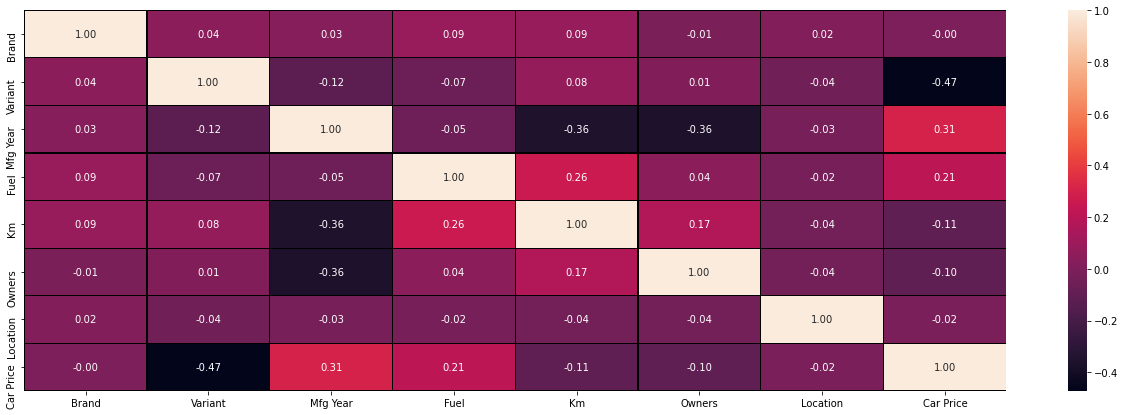

In [44]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [45]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Car Price'].sort_values(ascending=False)

Car Price    1.000000
Variant      0.471723
Mfg Year     0.308598
Fuel         0.213797
Km           0.109187
Owners       0.104298
Location     0.016227
Brand        0.001232
Name: Car Price, dtype: float64

In [46]:
#None of the features are highly correlated among each other 
#Nor, any of the feature is highly correlated with the target i.e. Car Price

# DIVIDE DATA INTO FEATURES & LABEL

In [47]:
#diving the columns in feature and label
X = df.drop(columns=['Car Price'])
y = df['Car Price']

# DATA VISUALIZATION

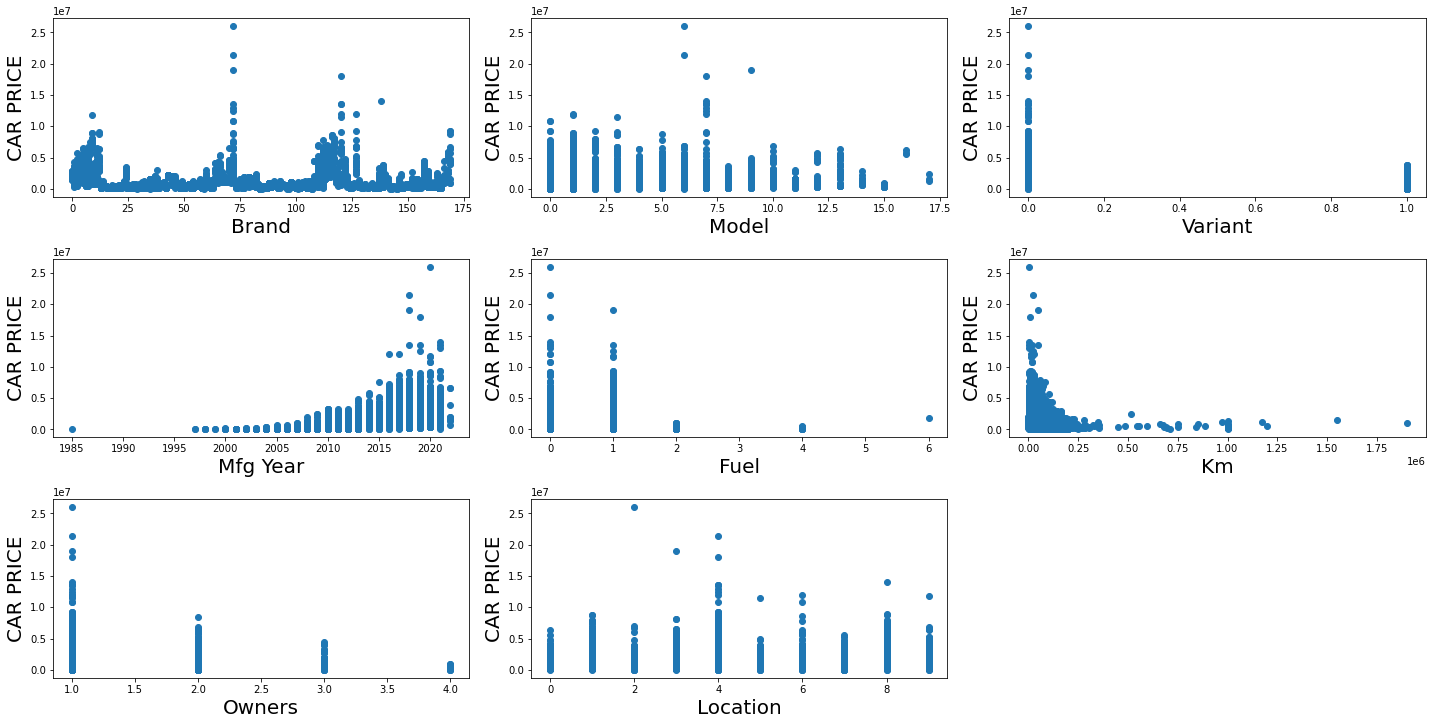

In [48]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('CAR PRICE', fontsize=20)
	plotnumber+=1
plt.tight_layout()

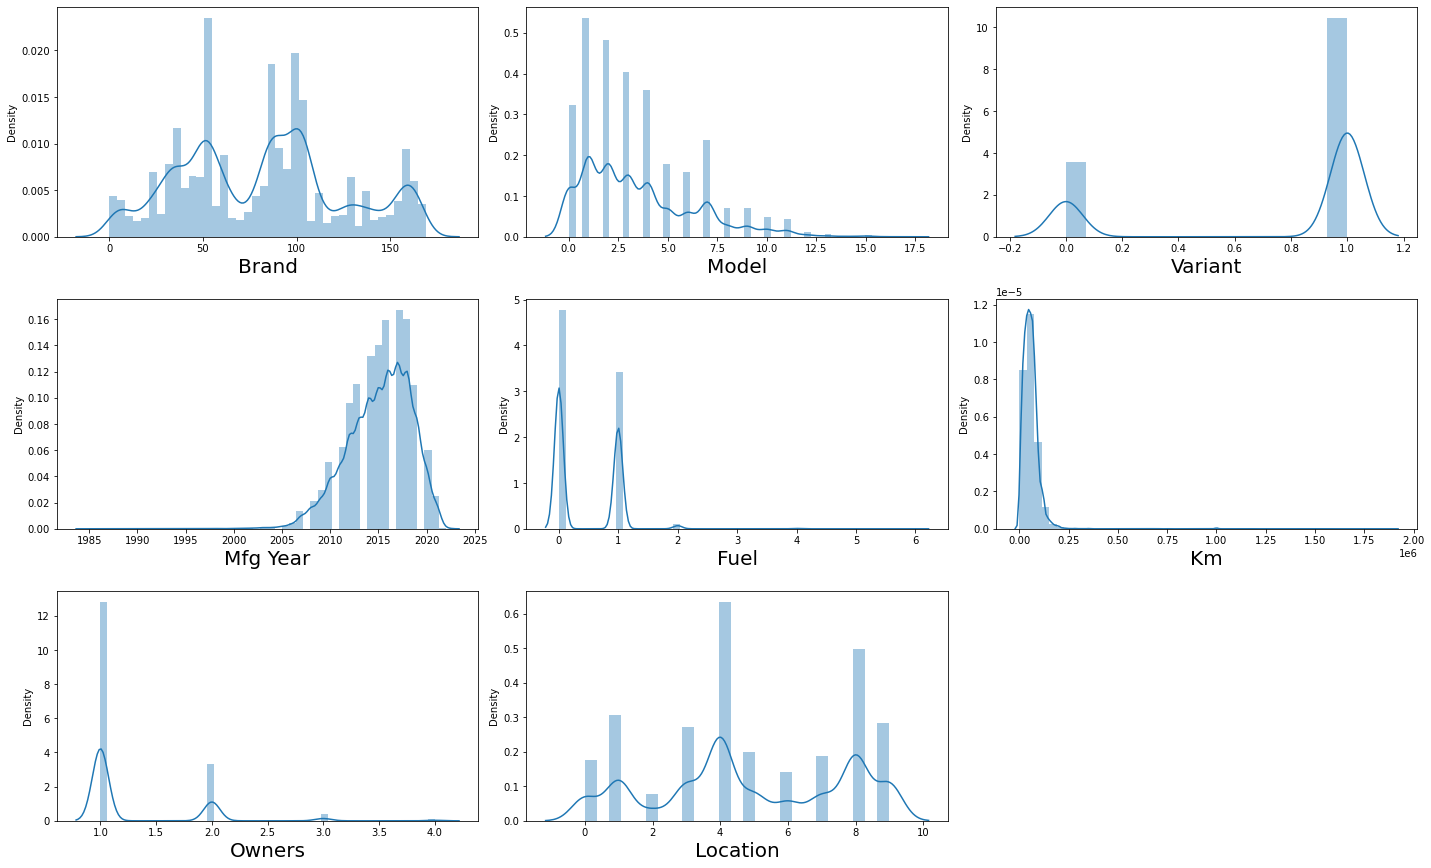

In [49]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

km is right skewed

In [50]:
#We will not treat km as it shows the natural data which means many cars have driven kms more than 0.25(x1000) kms

In [51]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

# APPLYING REGRESSION MODELS & FINDING BEST FIT MODEL

In [52]:
model_name=[]
r2_scores=[]
rmse_value=[]
cvs=[]

In [53]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
maxAccu=0 #maximum R2SCORE
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	lr.fit(x_train,y_train)
	y_pred_train=lr.predict(x_train)
	y_pred=lr.predict(x_test)
	acc = r2_score(y_test,y_pred)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best r2score is", maxAccu,"on Random State", maxRS)

Best r2score is 0.384389857806983 on Random State 38


In [54]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=38)

R2Score : 38.37224507046918
MAE: 390691.80567764404
MSE: 527797767401.0207
RMSE: 726496.9149287702


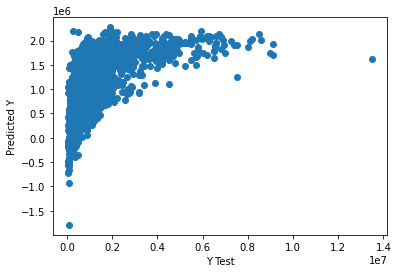

In [55]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score :",r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr = cross_val_score(lr,X,y,cv=5)
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr.mean())

R2Score: 43.82901480750917
MAE: 168240.34762308997
MSE: 481064426429.49866
RMSE: 693588.0812337382


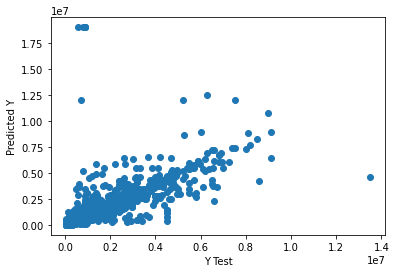

In [56]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score:", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr2 = cross_val_score(dtr,X,y,cv=5)
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr2.mean())

R2Score:  86.00792401159228
MAE: 123451.78850151792
MSE: 119832151543.2698
RMSE: 346167.80835783936


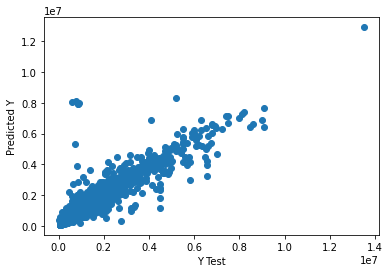

In [57]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr3 = cross_val_score(rdr,X,y,cv=5)
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr3.mean())

R2 Score:  -8.987341057252273
MAE: 458278.9680207173
MSE: 933398845224.3181
RMSE: 966125.6881091187


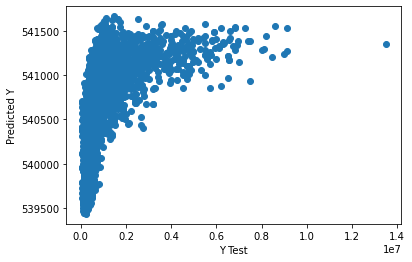

In [58]:
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr4 = cross_val_score(svr,X,y,cv=5)
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr4.mean())

R2 Score:  -27.107193905045747
MAE: 793736.642349869
MSE: 1088582461593.8596
RMSE: 1043351.5522554512


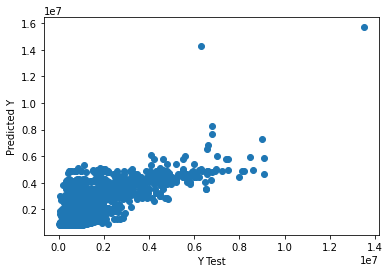

In [59]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr5 = cross_val_score(ada,X,y,cv=5)
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr5.mean())

R2 Score:  93.43220977197977
MAE: 106348.57775360781
MSE: 56248439085.13466
RMSE: 237167.5337923272


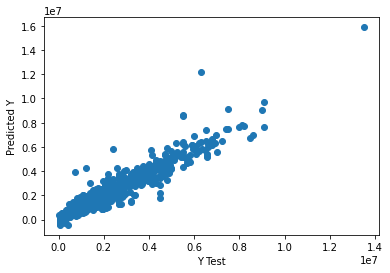

In [60]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ",r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr6 = cross_val_score(xgb,X,y,cv=5)
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr6.mean())

In [61]:
import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value
Regression_Scores['Cross Value Score'] = cvs
Regression_Scores

,Model Name,r2 Score,RMSE,Cross Value Score
0,Linear Regression,38.372245,7.264969e+05,0.153563
1,Decision Tree Regressor,43.829015,6.935881e+05,-1.195267
2,Random Forest Regressor,86.007924,3.461678e+05,-0.099038
3,SVR,-8.987341,9.661257e+05,-0.079488
4,ADA Boost,-27.107194,1.043352e+06,-2.390480
5,XGBoost,93.432210,2.371675e+05,-0.054754


Text(0.5, 1.0, 'XGBRegressor')

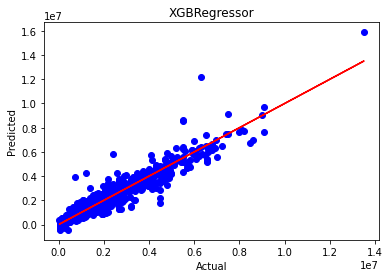

In [62]:
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBRegressor')

# HYPER PARAMETER TUNING

In [63]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   37.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 20.8min finished


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
import xgboost as xgb

xgb = xgb.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints=None,
             n_estimators=1100, n_jobs=0, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test,y_pred, multioutput='variance_weighted'))

R2 score: 0.948274634298452


In [72]:
#We were sucessfully able to improve the R2 Score of XGBoost Regressor to 0.9483

# SAVE THE MODEL

In [73]:
#saving the model to the local file system
filename = 'Car Price Prediction_XGB.pickle'
pickle.dump(xgb, open(filename, 'wb'))